# Linear Regression Project: JFK Flight Data
### Kieran Thakkar

In [1]:
# Import modules and dataset
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn import metrics

df = pd.read_csv("data.csv")
df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

<Axes: >

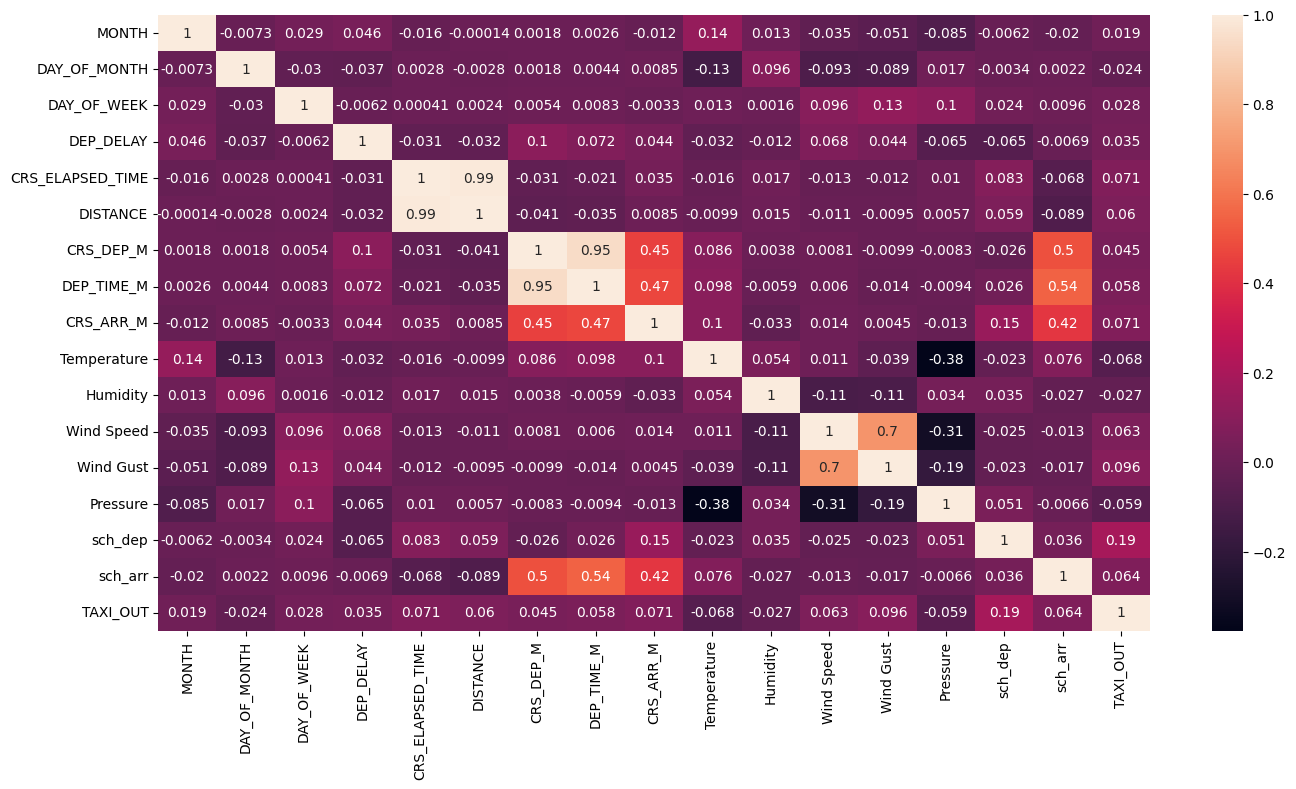

In [13]:
# Heat map from correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True)

## What do we want to investigate?
"Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight."

### Lets see if we can estimate TAXI_OUT.
Lets look at numeric data only, and see if we can split the research into several areas.

1. All numeric data
2. All numeric weather data (Temperature, Dew Point, Humidity, Wind Speed, Wind Gust, Pressure)
3. Scheduled departure time (sch_dep)  -- highest correlation, see corr_matrix.


In [63]:
y = df.TAXI_OUT

## 1. All Numeric Data

In [167]:
droppers = ["OP_UNIQUE_CARRIER", "TAIL_NUM", "DEST", "Dew Point", "Wind", "Condition"]
cleaned = df.drop(columns=droppers)

allX = cleaned.iloc[:,:-1] # all numeric data except TAXI_OUT

# split the data. 90% training, 10% testing.
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.1, random_state=69)

# linear regression
linearReg = LinearRegression()
linearReg.fit(allX_train, y_train)
y_allX_basicLinReg = linearReg.predict(allX_test)

# LASSO
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(allX_train, y_train)
y_allX_LASSO = lassoReg.predict(allX_test)

# RIDGE
ridgeReg = Ridge(alpha=1)
ridgeReg.fit(allX_train, y_train)
y_allX_RIDGE = ridgeReg.predict(allX_test)

In [ ]:

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", metrics.r2_score(y_test, y_pred))

## 2. All Numeric Weather Data

In [106]:
weatherData = df.iloc[:,12:19].drop(columns="Wind")

y = df.TAXI_OUT
weatherX = weatherData # all numeric weather data

# split the data. 90% training, 10% testing.
weatherX_train, weatherX_test, y_train, y_test = train_test_split(weatherX, y, test_size=0.1, random_state=69)


# linear regression
linearReg = LinearRegression()
linearReg.fit(weatherX_train, y_train)

y_weatherX_basicLinReg = linearReg.predict(weatherX_test)

test_weatherX_basicLinReg = pd.DataFrame({"Actual":y_test,"Predicted":y_weatherX_basicLinReg})



# LASSO
lassoReg = Lasso(alpha=0.01)
lassoReg.fit(weatherX_train, y_train)

y_weatherX_LASSO = lassoReg.predict(weatherX_test)

test_weatherX_LASSO = pd.DataFrame({"Actual": y_test, "Predicted": y_weatherX_LASSO})



# RIDGE
ridgeReg = Ridge(alpha=0.01)
ridgeReg.fit(weatherX_train, y_train)

y_weatherX_RIDGE = ridgeReg.predict(weatherX_test)

test_weatherX_RIDGE = pd.DataFrame({"Actual": y_test, "Predicted": y_weatherX_RIDGE})

## 3. Scheduled departure time (sch_dep)

In [146]:
scheduledDepartureX = df.sch_dep.values.reshape(-1, 1)

y = df.TAXI_OUT

# split the data. 90% training, 10% testing.
scheduledDepartureX_train, scheduledDepartureX_test, y_train, y_test = train_test_split(scheduledDepartureX, y, test_size=0.1, random_state=69)


# linear regression
linearReg = LinearRegression()
linearReg.fit(scheduledDepartureX_train, y_train)
y_scheduledDepartureX_basicLinReg = linearReg.predict(scheduledDepartureX_test)


# LASSO
lassoReg = Lasso(alpha=0.01)
lassoReg.fit(scheduledDepartureX_train, y_train)
y_scheduledDepartureX_LASSO = lassoReg.predict(scheduledDepartureX_test)


# RIDGE
ridgeReg = Ridge(alpha=0.01)
ridgeReg.fit(scheduledDepartureX_train, y_train)
y_scheduledDepartureX_RIDGE = ridgeReg.predict(scheduledDepartureX_test)

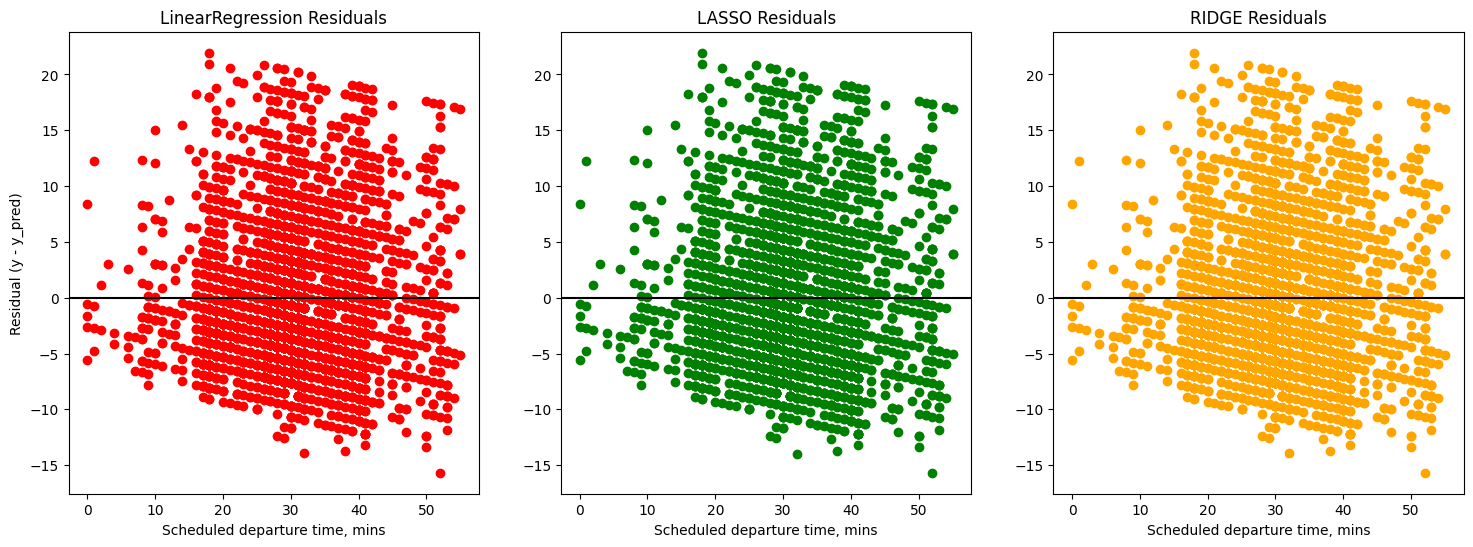

In [155]:
fig, (cx1, cx2, cx3) = plt.subplots(1, 3, figsize=(18,6))

cx1.set_title("LinearRegression Residuals")
cx1.axhline(0, color="black")
cx1.scatter(scheduledDepartureX_test, y_test-y_scheduledDepartureX_basicLinReg, color="red")
cx1.set(xlabel='Scheduled departure time, mins', ylabel='Residual (y - y_pred)')

cx2.set_title("LASSO Residuals")
cx2.axhline(0, color="black")
cx2.scatter(scheduledDepartureX_test, y_test-y_scheduledDepartureX_LASSO, color="green")
cx2.set(xlabel='Scheduled departure time, mins')

cx3.set_title("RIDGE Residuals")
cx3.axhline(0, color="black")
cx3.scatter(scheduledDepartureX_test, y_test-y_scheduledDepartureX_RIDGE, color="orange")
cx3.set(xlabel='Scheduled departure time, mins')


plt.show()